This is an example

The pyflowline python package uses the OOP approach to manage configuration settings.
Set up the case object. We provide two options to set up a simulation case. First, from scratch (iFlag_option: 1); second, using a json file (iFlag_option = 2). For details of the json file format, please read the documentation.

In [6]:
import os
from pathlib import Path
from pyflowline.classes.pycase import flowlinecase
from pyflowline.pyflowline_read_model_configuration_file import pyflowline_read_model_configuration_file

iFlag_option = 2
print(iFlag_option)

if iFlag_option ==1:

    oPyflowline=flowlinecase()
    oPyflowline.iCase_index = 1


else: 
    if iFlag_option ==2:

        #an example configuration file is provided with the repository, but you need to update this file based on your own case study
        #linux
        #sFilename_configuration_in = str(Path.cwd()) +  '/configurations/pyflowline_susquehanna_hexagon.json' 
        #mac
        sFilename_configuration_in = '/Users/liao313/workspace/python/pyflowline/configurations/pyflowline_susquehanna_hexagon_mac.json'
        print(sFilename_configuration_in)
        oPyflowline = pyflowline_read_model_configuration_file(sFilename_configuration_in)

        #print the case information in details
        print(oPyflowline.tojson())
        

        



2
/Users/liao313/workspace/python/pyflowline/configurations/pyflowline_susquehanna_hexagon_mac.json
{
    "aBasin": [
        1
    ],
    "dLatitude_bot": 39.0,
    "dLatitude_top": 43.00334,
    "dLongitude_left": -79.44374,
    "dLongitude_right": -74.24774,
    "dResolution": 5000.0,
    "dResolution_meter": 5000.0,
    "iCase_index": 2,
    "iFlag_create_mesh": 1,
    "iFlag_flowline": 1,
    "iFlag_intersect": 1,
    "iFlag_rotation": 1,
    "iFlag_save_mesh": 1,
    "iFlag_simplification": 1,
    "iFlag_standalone": 1,
    "iFlag_use_mesh_dem": 0,
    "iMesh_type": 1,
    "sCase": "pyflowline20211217002",
    "sDate": "20211217",
    "sFilename_basins": "/Users/liao313/workspace/python/pyflowline/configurations/pyflowline_susquehanna_basin_mac.json",
    "sFilename_dem": "/Users/liao313/data/hexwatershed/susquehanna/raster/dem/dem_ext.tif",
    "sFilename_mesh": "/Users/liao313/scratch/04model/pyflowline/susquehanna/pyflowline20211217002/hexagon.json",
    "sFilename_mesh_info":

After the case object was created, we can run the mainly three types of operations. 
First, we can preprocess the flowline.

Before the operation, we can visualize the original or raw flowline dataset. For most visualization, all you need to provide is a keyword, a look up table is provided in the documentation.
Be default, all the dataset will be converted to the WGS84 system to maintain consistency.

In [7]:
#pyflowline can process multiple basins within one singel run
#the total number of basin is controlled by the nOutlet variable
#convert the raw flowline into geojson in WGS84 system        
oPyflowline.convert_flowline_to_json()

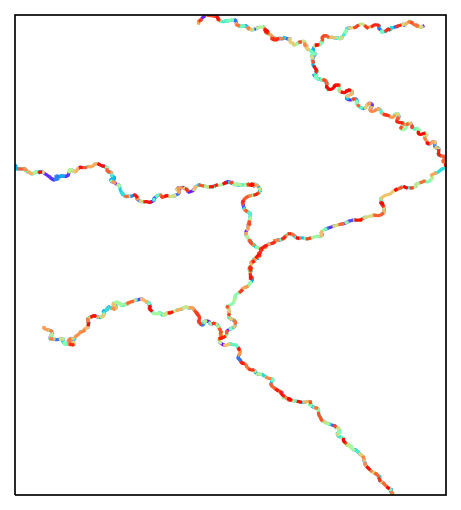

In [8]:

oPyflowline.plot(sVariable_in = 'flowline_filter_json')

In [9]:
oPyflowline.preprocess_flowline()

971952.7976931339


After the preprocess, we can visualize the final flowline 

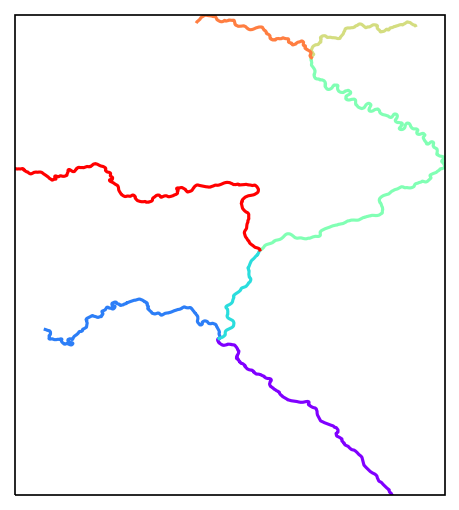

In [11]:
oPyflowline.plot(sVariable_in = 'flowline_simplified')

Second, we can creata a mesh

In [12]:
oPyflowline.create_mesh()

30.0 1421965.7434172274 2405544.2507965835 13330 10437


 ...]

We can also visualize the mesh:

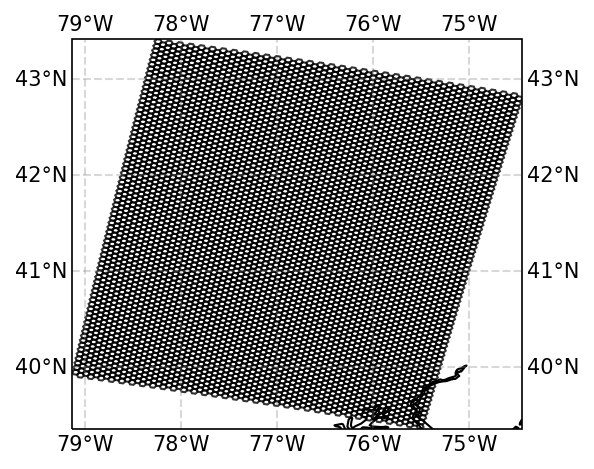

In [13]:
oPyflowline.plot(sVariable_in = 'mesh')

Last, we can operate the intersect to generate desired flowlines. But we recommend that we run the intersect with some postprocess.

In [ ]:
oPyflowline.intersect_flowline_with_mesh()


After this step, we can now visualize the final flowline again.

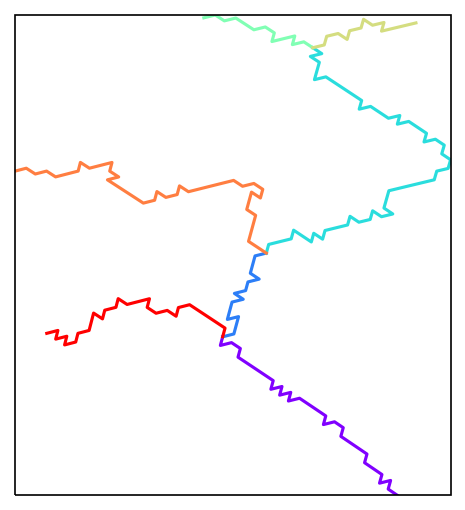

In [14]:
oPyflowline.plot(sVariable_in = 'final')